epoch 1
train mean loss=2533982083.3614006
 test mean loss=226734011.73333332
epoch 2
train mean loss=2530176745.2705293
 test mean loss=225843841.70666668
epoch 3
train mean loss=2498265272.396832
 test mean loss=220708399.78666666
epoch 4
train mean loss=2370530322.781159
 test mean loss=204117620.05333334
epoch 5
train mean loss=2051558647.1429763
 test mean loss=168316067.84
epoch 6
train mean loss=1617051534.0325136
 test mean loss=136345149.44
epoch 7
train mean loss=1415838279.9233015
 test mean loss=129433545.38666667
epoch 8
train mean loss=1392002193.9808254
 test mean loss=128363601.92
epoch 9
train mean loss=1390289674.9912465
 test mean loss=128196389.54666667
epoch 10
train mean loss=1388317838.9929137
 test mean loss=128098481.49333334
epoch 11
train mean loss=1385973636.6419342
 test mean loss=127864149.33333333
epoch 12
train mean loss=1385013994.1242185
 test mean loss=127963709.44
epoch 13
train mean loss=1383264564.608587
 test mean loss=127613883.73333333
epoch 14


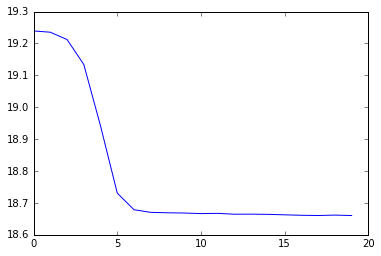

In [93]:
#金額予測のNN

#!/usr/bin/env python
# coding: utf-8
import pandas as pd
temp=pd.read_csv("features.csv",names=('ShopID','Square','ShopType','ShopRank','Category','PS'))
temptarget = pd.read_csv("sales.csv",header=0)


#from __future__ import print_function
import numpy as np
from sklearn.cross_validation import train_test_split

import six
import sys
import chainer
import chainer.links as L
from chainer import optimizers
import chainer.functions as F
from matplotlib import pyplot
%matplotlib inline


batchsize = 40
n_epoch = 20

# Prepare dataset
target_list=[]
for i in zip(temptarget['sales']):
    target_list.append([i])
target = np.array(target_list)


feature_lists = []
#for i,j,k,l in zip(temp['ShopID'],temp['Square'],temp['ShopType'],temp['PS']):
for i,j in zip(temp['Square'],temp['ShopType']):
    feature_lists.append([i,j])
features = np.array(feature_lists)

target=target.astype(np.float32).reshape(len(target_list), 1)
feature=features.astype(np.float32)


x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)
N_test = y_test.size  # test data size
N = len(x_train)  # train data size
in_units = x_train.shape[1]  


n_units_2 = 90
n_units_3 = 50
n_units_4 = 30
n_units_5 = 10

model = chainer.Chain(
    l1=L.Linear(in_units, n_units_2),
    l2=L.Linear(n_units_2, n_units_3),
    l3=L.Linear(n_units_3,  n_units_4),
    l4=L.Linear(n_units_4,  n_units_5),
    l5=L.Linear(n_units_5,  1))


def forward(x):
    h1 = F.relu(model.l1(x))
    h2 = F.relu(model.l2(h1))
    h3 = F.relu(model.l3(h2))
    h4 = F.relu(model.l4(h3))
    y = model.l5(h4)
    return y
    #return F.tanh(model.l5(h4))

# Setup optimizer最適化のセットアップ
optimizer = optimizers.Adam()#勾配法のアルゴリズム:Adam
optimizer.setup(model)
#optimizer.add_hokk(optimizer.WeightDecay())#正則化をhook関数として登録

# Learning loop
LOSS = []
Ylist = []
for epoch in six.moves.range(1, n_epoch + 1):
    print('epoch', epoch)
    # training
    perm = np.random.permutation(N)
    sum_loss = 0.0
    for i in six.moves.range(0, N, batchsize):
        x = chainer.Variable(np.asarray(x_train[perm[i:i + batchsize]]))
        t = chainer.Variable(np.asarray((y_train[perm[i:i + batchsize]])))
        model.zerograds()#勾配をゼロ初期化
        y = forward(x)
        loss = F.mean_squared_error(y, t)#平均2乗誤差
        sum_loss += loss.data
        loss.backward()#勾配計算
        optimizer.update()#最適化ルーチンを実行
    print('train mean loss={}'.format(sum_loss / N))

    # all test data
    x = chainer.Variable(np.asarray(x_test))#特徴量
    t = chainer.Variable(np.asarray((y_test)))#教師データ
    y = forward(x)#出力
    loss = F.mean_squared_error(y, t)
    LOSS.append(loss.data/N_test)
    print(' test mean loss={}'.format(loss.data / N_test))
Ylist.append(y.data)
#print("Y = ", Ylist)
pyplot.plot(np.log(LOSS))

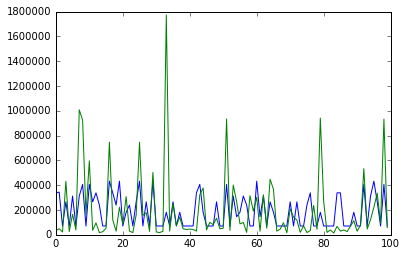

In [94]:
pyplot.plot(Ylist[0][0:100])#出力　青
pyplot.plot(y_test[0:100])#教師　緑　　結果比較の図

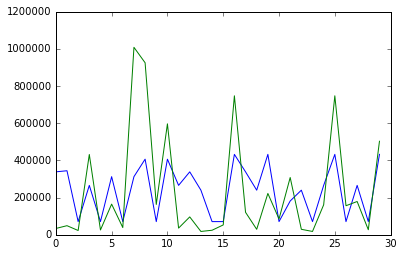

In [95]:
pyplot.plot(np.log(Ylist[0][0:30])
pyplot.plot(y_test[0:30])

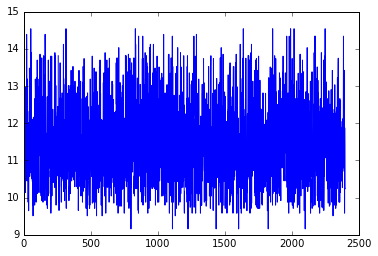

In [90]:
pyplot.plot(y_train)

[[  259800.]
 [  177000.]
 [   49000.]
 [  118000.]
 [  114000.]
 [   26000.]
 [   70500.]
 [   39500.]
 [   23000.]
 [  217800.]
 [  322900.]
 [  147000.]
 [   33000.]
 [ 1773100.]
 [   34300.]
 [  191400.]
 [   43000.]
 [   14500.]
 [  134000.]
 [  217800.]] [[ 35.   0.   4.   1.]
 [ 35.   0.   4.   0.]
 [ 15.  28.   2.   0.]
 [ 18.  11.   3.   0.]
 [  7.  20.   4.   0.]
 [ 39.   0.   4.   0.]
 [ 13.   0.   4.   1.]
 [ 21.   0.   4.   1.]
 [ 40.   0.   4.   1.]
 [ 21.   0.   4.   1.]
 [ 17.  37.   2.   1.]
 [ 40.   0.   4.   0.]
 [ 18.  11.   3.   0.]
 [ 10.  16.   1.   0.]
 [ 36.   0.   4.   1.]
 [ 35.   0.   4.   0.]
 [ 32.   0.   4.   0.]
 [ 39.   0.   4.   0.]
 [ 16.  23.   3.   0.]
 [ 21.   0.   4.   1.]]
